## Data Cleaning

We will perform an analysis of the features present 

** Basic imports **

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display


from collections import Counter


** load data **

Here we are using a small toy dataset to explore the data

In [2]:
inputFile='../../data/smallData/rawData/RejectedLoans.csv'

data=pd.read_csv(inputFile)
print(data.shape)

(755491, 9)


In [7]:
data.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,5/26/2007,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,5/26/2007,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,5/27/2007,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,5/27/2007,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,5/27/2007,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0


** check the type of the data series**

In [8]:
data.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code               int64
dtype: object

**Check the type of data**

Text(0.5,1,'types encountered in the dataset')

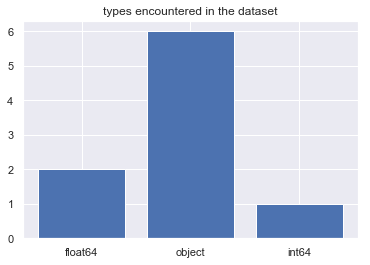

In [10]:
types=data.dtypes

typesSeen=[]
for t in types:
    if not t in typesSeen:
        typesSeen+=[t]

counts=[]
for t in typesSeen:
    counts+= [(types==t).sum()]

plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), typesSeen)
plt.title('types encountered in the dataset')

## CLEAN THE OBJECT FEATURES

In [11]:
objFeatures=types[types=='object'].keys()
print('object features : {} entries'.format(len(objFeatures)))
print(list(objFeatures))


object features : 6 entries
['Application Date', 'Loan Title', 'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length']


In [3]:
data = data.dropna(axis=0)

* Application Date

format the date

In [17]:
data['Application Date']=pd.to_datetime(data['Application Date'])

In [39]:
months = ['January','February','March', 'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]
dummies = pd.get_dummies(data['Application Date'].dt.month, drop_first=True, prefix= 'issue_d_month')

In [40]:
data = pd.concat([data, dummies], axis=1)

In [41]:
data.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code,issue_d_year,...,issue_d_month_3,issue_d_month_4,issue_d_month_5,issue_d_month_6,issue_d_month_7,issue_d_month_8,issue_d_month_9,issue_d_month_10,issue_d_month_11,issue_d_month_12
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0,0,...,0,0,1,0,0,0,0,0,0,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0,0,...,0,0,1,0,0,0,0,0,0,0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
data['issue_d_year']=data['Application Date'].dt.year - 2007

In [44]:
data=data.drop('Application Date', axis=1)

In [45]:
data.head()

,Amount Requested,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code,issue_d_year,issue_d_month_2,issue_d_month_3,issue_d_month_4,issue_d_month_5,issue_d_month_6,issue_d_month_7,issue_d_month_8,issue_d_month_9,issue_d_month_10,issue_d_month_11,issue_d_month_12
0,1000.0,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1000.0,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0,0,0,0,0,1,0,0,0,0,0,0,0
2,11000.0,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0,0,0,0,0,1,0,0,0,0,0,0,0
3,6000.0,waksman,698.0,38.64%,017xx,MA,< 1 year,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1500.0,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0,0,0,0,0,1,0,0,0,0,0,0,0


In [146]:
data= data.drop('Application Date', axis=1)

## Debt to income ratio

Convert it to float

In [73]:
def convert_dti(s):
    try:
        return(float(str(s)[:-1]))
    except:
        return(s)

In [56]:
data['Debt-To-Income Ratio'] = data['Debt-To-Income Ratio'].apply(convert_dti)

## Zip code

In [133]:
def convert_zip(s):
    try:
        return(str(s)[:-2])
    except:
        return(s)
data['Zip Code'] = data['Zip Code'].apply(convert_zip)

In [134]:
data['ZipCode_digit_1']=data['Zip Code'].str[0]
data['ZipCode_digit_2']=data['Zip Code'].str[1]
data['ZipCode_digit_3']=data['Zip Code'].str[2]
##https://benfry.com/zipdecode/

In [147]:
data= data.drop('Zip Code', axis=1)

## State

Use categorical variable

In [138]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
"SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [143]:
dummies = pd.get_dummies(data['State'], prefix='state', drop_first=True)

In [144]:
data = pd.concat([data, dummies], axis=1)

In [148]:
data= data.drop('State', axis=1)

In [149]:
data.head()

,Amount Requested,Loan Title,Risk_Score,Debt-To-Income Ratio,Employment Length,Policy Code,ZipCode_digit_1,ZipCode_digit_2,ZipCode_digit_3,state_AL,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1000.0,Wedding Covered but No Honeymoon,693.0,10%,4 years,0,4,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,1000.0,Consolidating Debt,703.0,10%,< 1 year,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,11000.0,Want to consolidate my debt,715.0,10%,1 year,0,2,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,6000.0,waksman,698.0,38.64%,< 1 year,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,1500.0,mdrigo,509.0,9.43%,< 1 year,0,2,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


## Emp lenght

In [157]:
length_to_int = dict()
length_to_int['< 1 year']=0
length_to_int['1 year']=1
length_to_int['2 years']=2
length_to_int['3 years']=3
length_to_int['4 years']=4
length_to_int['5 years']=5
length_to_int['6 years']=6
length_to_int['7 years']=7
length_to_int['8 years']=8
length_to_int['9 years']=9
length_to_int['10+ years']=10


def embed_emp_length(s):
    """
    convert the string emp_length into an integer
    does not change the NaN input
    """
    try:
        return(length_to_int[s])
    except:
        pass

data['Employment Length']= data['Employment Length'].apply(embed_emp_length)

## clean feature not present in the accepted dataset...

In [164]:
data=data.drop('Risk_Score', axis=1)

In [8]:
c = Counter(data['Loan Title'])

In [18]:
c.most_common(10)

[('debt_consolidation', 242502),
 ('other', 89374),
 ('credit_card', 51880),
 ('car', 40666),
 ('home_improvement', 40345),
 ('small_business', 36674),
 ('major_purchase', 34789),
 ('medical', 18166),
 ('moving', 17275),
 (' ', 12648)]